https://python.plainenglish.io/scrape-everythings-from-instagram-using-python-39b5a8baf2e5 https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

In [27]:
import pandas as pd
import instaloader
from datetime import datetime
from itertools import dropwhile, takewhile
from instagram_web_api import Client, ClientError, ClientLoginError, ClientCookieExpiredError
import string
import random
import hashlib
import networkx as nx
import getpass
import datetime
import os

In [24]:
user = input('user: ')
passwrd = getpass.getpass('password: ')
settingsfile = './data/settings.json'

user: jastiso
password: ········


In [25]:
class MyClient(Client):
    @staticmethod
    def _extract_rhx_gis(html):
        options = string.ascii_lowercase + string.digits
        text = ''.join([random.choice(options) for _ in range(8)])
        return hashlib.md5(text.encode())
    
    def login(self):
        """Login to the web site."""
        if not self.username or not self.password:
            raise ClientError('username/password is blank')

        time = str(int(datetime.datetime.now().timestamp()))
        enc_password = f"#PWD_INSTAGRAM_BROWSER:0:{time}:{self.password}"

        params = {'username': self.username, 'enc_password': enc_password, 'queryParams': '{}', 'optIntoOneTap': False}
        self._init_rollout_hash()
        login_res = self._make_request('https://www.instagram.com/accounts/login/ajax/', params=params)
        if not login_res.get('status', '') == 'ok' or not login_res.get ('authenticated'):
            raise ClientLoginError('Unable to login')

        if self.on_login:
            on_login_callback = self.on_login
            on_login_callback(self)
        return login_res
    

In [28]:
# save login settings
device_id = None
try:

    settings_file = settingsfile
    if not os.path.isfile(settings_file):
        # settings file does not exist
        print('Unable to find file: {0!s}'.format(settings_file))

        # login new
        api = MyClient(
            username, passwrd,
            on_login=lambda x: onlogin_callback(x, settings_file))
    else:
        with open(settings_file) as file_data:
            cached_settings = json.load(file_data, object_hook=from_json)
        print('Reusing settings: {0!s}'.format(settings_file))

        device_id = cached_settings.get('device_id')
        # reuse auth settings
        api = MyClient(
            user, passwrd,
            settings=cached_settings)

except (ClientCookieExpiredError, ClientLoginRequiredError) as e:
    print('ClientCookieExpiredError/ClientLoginRequiredError: {0!s}'.format(e))

    # Login expired
    # Do relogin but use default ua, keys and such
    api = MyClient(
        args.username, args.password,
        device_id=device_id,
        on_login=lambda x: onlogin_callback(x, args.settings_file_path))

except ClientLoginError as e:
    print('ClientLoginError {0!s}'.format(e))
    exit(9)
except ClientError as e:
    print('ClientError {0!s} (Code: {1:d}, Response: {2!s})'.format(e.msg, e.code, e.error_response))
    exit(9)
except Exception as e:
    print('Unexpected Exception: {0!s}'.format(e))
    exit(99)

# Show when login expires
cookie_expiry = api.cookie_jar.auth_expires
print('Cookie Expiry: {0!s}'.format(datetime.datetime.fromtimestamp(cookie_expiry).strftime('%Y-%m-%dT%H:%M:%SZ')))



Unable to find file: ./data/settings.json


NameError: name 'ClientLoginRequiredError' is not defined

In [9]:
res = api.tag_feed('nyctattoo', count=10)


In [10]:
res

{'data': {'hashtag': {'id': '17841564334103111',
   'name': 'nyctattoo',
   'allow_following': True,
   'is_following': False,
   'is_top_media_only': False,
   'profile_pic_url': 'https://scontent-lga3-1.cdninstagram.com/v/t51.2885-15/296836303_759679718794624_7281402611500135464_n.jpg?stp=c0.180.1440.1440a_dst-jpg_e35_s150x150&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=104&_nc_ohc=51KDAa0J6TsAX_znufP&edm=AA0rjkIBAAAA&ccb=7-5&oh=00_AT-f8corqIQ41vFTb1VgNaEcVLdKpBdnZIqpZmbobBkbxQ&oe=630274AC&_nc_sid=d997c6',
   'edge_hashtag_to_media': {'count': 336011,
    'page_info': {'has_next_page': True,
     'end_cursor': 'QVFBdm9mQ25Ya0J1VXlULUZCWFRoRHhBcUJxbkFLekpFbFBLNUxjQzBOM0ZsdEcwdS1HQmY1Q21xYVAyelZNc1Rabl90ai1PZWl4LV8tTm5MS19QRW81bg=='},
    'edges': [{'node': {'comments_disabled': False,
       '__typename': 'GraphSidecar',
       'id': '2906171813127692770',
       'edge_media_to_caption': {'edges': [{'node': {'text': 'Puppy for @residentspooks !!! So good to meet you dude!! Had suc

In [11]:
tags = [comment['node']['edge_media_to_caption']['edges'][0]['node']['text'] 
        for comment in res['data']['hashtag']['edge_hashtag_to_media']['edges']]

In [12]:
remove_tags = ['flashtattoo', 'flash', 'flashdesign', 'tat', 'tatted', 'tattoo', 'inked', 'tattooartist', 'nyctattoo']

In [13]:
# clean hashtags
def clean(x, rm_tags):
    x = x[x.find('#'):]
    curr_tags = x.split('#')
    curr_tags = [x.strip(' ') for x in curr_tags]
    while("" in curr_tags) :
        curr_tags.remove("")
        
    curr_tags = [x for x in curr_tags if x not in rm_tags]
    return list(set(curr_tags))

clean_tags = [clean(x, remove_tags) for x in tags]
clean_tags

[['lettering', 'contourlinedrawing', 'bushwicktattoo', 'linedrawing'],
 ['nyc',
  'digitalart',
  'radiantcolorsink',
  'nyctattooartist',
  'sunskinlatamtattoo',
  'sunskintattoomachines',
  'adobephotoshop',
  'neotraditionaltattoo',
  'dermalizepro',
  'inknation',
  'tomysupply',
  'jluissftattooart',
  'thunderkid',
  'fkirons',
  'food',
  'art',
  'whipshading',
  'traditionaltattoo',
  'criticaltattoosupply'],
 ['brooklyntattoo', 'finelinetattoo'],
 ['tattooideas',
  'cutetattoo',
  'sanrio',
  'nyctattooartist',
  'foodtattoo',
  'kawaii ty for coming 🍡',
  'colortattoo',
  'tattooideasforgirls',
  'cinnamoroll parfait 🍡🍓🌸\n.\n.\n.\n.\n.\n',
  'parfait',
  'kawaiitattoo',
  'tattoonyc',
  'sanriotattoo'],
 ['spiketattoo'],
 ['ignoranttattoo',
  'dotworktattoo',
  'angel',
  'blastover',
  'fairy',
  'michigantattooartist',
  'latattoo',
  'chesttattoo',
  'colortattoo',
  'ignorantstyletattoo',
  'qttr',
  'outsiderart',
  'scratcher',
  'lineworktattoo',
  'portraittattoo',
 

In [14]:
tag_graph = dict()
for k in range(len(clean_tags)):
    tag_graph[k] = [x for x in range(len(clean_tags))
                    if (x != k) & any(set(clean_tags[k]).intersection(clean_tags[x]))]
    

In [15]:
tag_graph

{0: [],
 1: [3, 6, 7, 15, 16],
 2: [5, 6, 7, 8, 13, 15, 16],
 3: [1, 5, 6, 11, 13, 15, 16],
 4: [],
 5: [2, 3, 6, 7, 8, 12, 13, 14, 15],
 6: [1, 2, 3, 5, 7, 8, 13, 15],
 7: [1, 2, 5, 6, 8, 12, 13, 14, 15],
 8: [2, 5, 6, 7, 12, 13, 14, 15, 16],
 9: [],
 10: [],
 11: [3, 12, 13, 15],
 12: [5, 7, 8, 11, 13, 14],
 13: [2, 3, 5, 6, 7, 8, 11, 12, 15, 16],
 14: [5, 7, 8, 12],
 15: [1, 2, 3, 5, 6, 7, 8, 11, 13, 16],
 16: [1, 2, 3, 8, 13, 15],
 17: [],
 18: [],
 19: []}

In [16]:
g = nx.Graph(tag_graph)

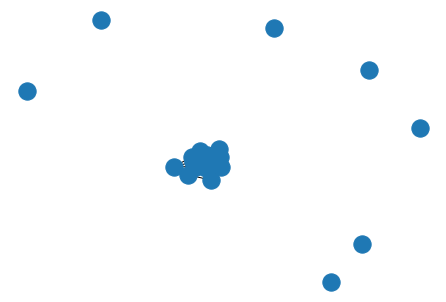

In [17]:
nx.draw(g)